In [1]:
import xarray as xr
import matplotlib.pyplot as plt

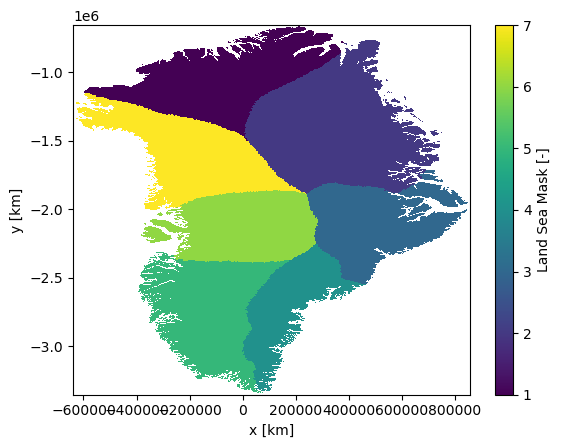

In [3]:
mask_tundra_sector_1k = "/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR/GrIS_topo_icemask_lsm_tundra_basins_ocean_lon_lat_1km.nc"
mask_tundra_sector_1k = xr.open_dataset(mask_tundra_sector_1k)
mask_tundra_sector_1k.Basins_All_Greenland.plot()

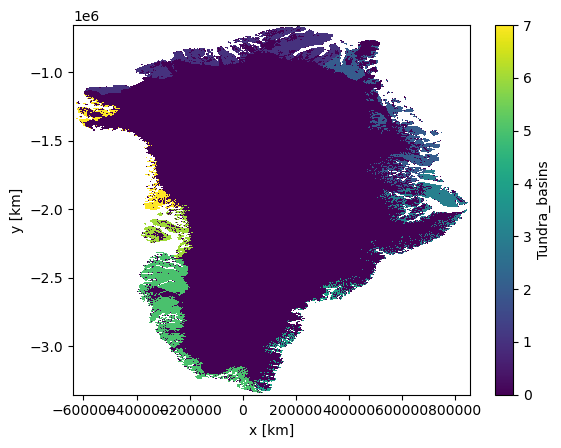

In [4]:
mask_tundra_sector_1k.Tundra_basins.plot()

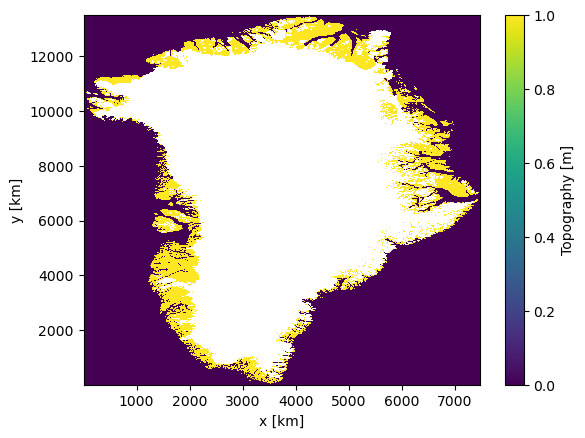

In [5]:
fname = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/masks1k.nc"
mask1 = xr.open_dataset(fname)
mask1['LSM'].where(mask1['Promicemask'] == 0).plot()

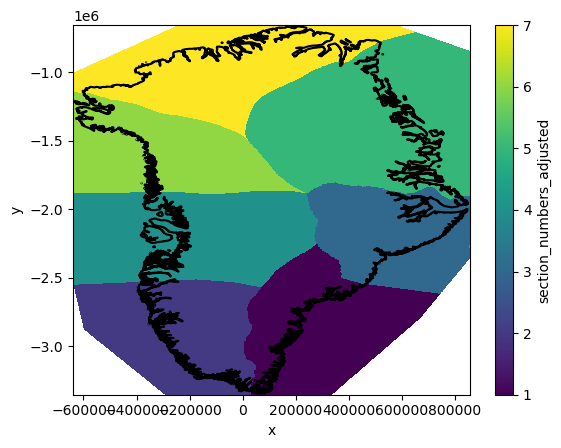

In [19]:
fname = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Mask_adjusted_section_numbers_slater_may24_copy.nc"
mask = xr.open_dataset(fname)

fig, ax = plt.subplots()
mask['section_numbers_adjusted'].plot(ax=ax)
mask['LSM'] = mask['section_numbers_adjusted']
mask['LSM'].values = mask1['LSM'].values 

mask['LON'] = mask['section_numbers_adjusted'].copy(data=mask1['LON'].values)
mask['LAT'] = mask['section_numbers_adjusted'].copy(data=mask1['LAT'].values)
mask['LSM'].plot.contour(ax=ax, levels=[0.5], colors='k')

fname = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Mask_adjusted_section_numbers_slater_with_lon_lat_13_June.nc"
mask.to_netcdf(fname)

# now also add 

In [18]:
mask

<xarray.Dataset> Size: 81MB
Dimensions:                   (y: 2700, x: 1496)
Coordinates:
  * y                         (y) float32 11kB -3.355e+06 ... -6.556e+05
  * x                         (x) float32 6kB -6.39e+05 -6.38e+05 ... 8.56e+05
Data variables:
    section_numbers_adjusted  (y, x) float64 32MB ...
    LSM                       (y, x) float32 16MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    LON                       (y, x) float32 16MB -55.79 -55.77 ... 7.484 7.516
    LAT                       (y, x) float32 16MB 59.2 59.21 ... 80.08 80.07

In [7]:
fname = "/Volumes/imau01/rapid/RACMO2.3p2/FGRN055/Downscaling_GR/Icemask_Topo_Iceclasses_lon_lat_average_1km.nc"
mask = xr.open_dataset(fname)
mask

<xarray.Dataset> Size: 162MB
Dimensions:       (time: 1, x: 1496, y: 2700)
Coordinates:
  * time          (time) float32 4B 0.0
  * x             (x) float32 6kB 5.0 10.0 15.0 ... 7.47e+03 7.475e+03 7.48e+03
  * y             (y) float32 11kB 5.0 10.0 15.0 ... 1.349e+04 1.35e+04 1.35e+04
Data variables:
    LON           (y, x) float32 16MB ...
    LAT           (y, x) float32 16MB ...
    Icemask       (y, x) float32 16MB ...
    Promicemask   (y, x) float32 16MB ...
    Topography    (y, x) float32 16MB ...
    GrIS          (y, x) float32 16MB ...
    GIC           (y, x) float32 16MB ...
    grounded_ice  (y, x) float32 16MB ...
    Easting       (y, x) float32 16MB ...
    Northing      (y, x) float32 16MB ...
Attributes:
    title:                      Daily Surface mass balance field (RACMO2.3)
    institution:                ULg (Xavier Fettweis)
    grid:                       Map Projection:Polar Stereographic Ellipsoid ...
    history:                    Mon Aug 10 13:33:00 2020: ncks -v Easting,Nor...
    netcdf:                     4.3.2 of Jan  5 2015 11:27:10 $
    NCO:                        netCDF Operators version 4.8.0 (Homepage = ht...
    history_of_appended_files:  Mon Aug 10 13:33:00 2020: Appended file GIMP_...

# 500m 

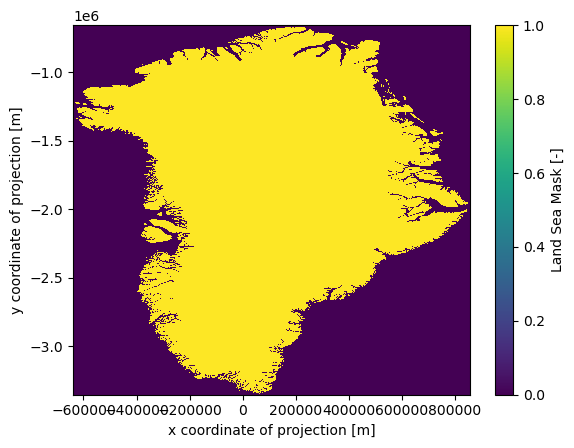

In [10]:
mask500m = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/GrIS_topo_icemask_lsm_lon_lat_0.5km.nc")

mask500m['LSM'].plot()

In [30]:
sections_500m = xr.open_mfdataset("scripts/Mask_adjusted_section_numbers_slater_0.5km_13_June.nc" )

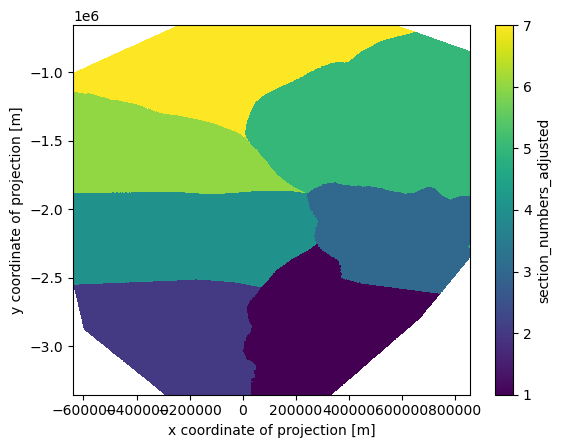

In [31]:
sections_500m['section_numbers_adjusted'].plot()

In [32]:
sections_500m.to_netcdf('sections_500m_compressed.nc', encoding={'section_numbers_adjusted': {'zlib': True, 'complevel': 5}})

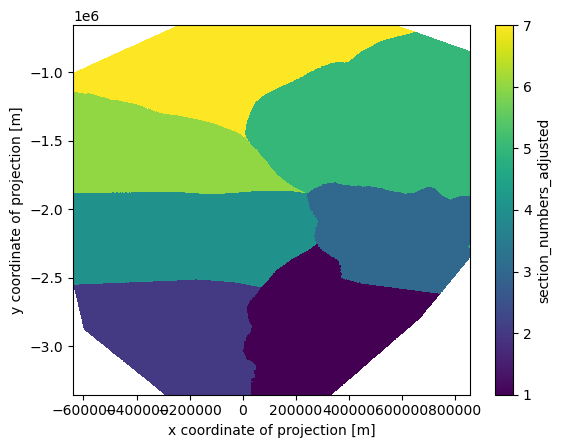

In [33]:
# now open it again
sections_500m = xr.open_dataset('sections_500m_compressed.nc')
sections_500m['section_numbers_adjusted'].plot()